In [446]:
import numpy as np
import pandas as pd
import os
os.environ["THREADPOOLCTL_VERSION"] = "pytorch"

In [447]:
# Try different encodings like 'latin1' or 'ISO-8859-1'
try:
    df = pd.read_csv('spam.csv', encoding='latin1')
    # If successful, print a message indicating the successful reading of the file
    print("File successfully loaded with 'latin1' encoding.")
except UnicodeDecodeError:
    # If an error still occurs, print an error message indicating the issue with the file
    print("Error: Unable to load the file. Please check the file encoding and format.")

File successfully loaded with 'latin1' encoding.


In [448]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4264,ham,&lt;DECIMAL&gt; m but its not a common car he...,NaN,NaN,NaN
1830,ham,That's the way you should stay oh.,NaN,NaN,NaN
2288,ham,Dont you have message offer,NaN,NaN,NaN
4700,ham,I liked the new mobile,NaN,NaN,NaN
4062,ham,How are you. Its been ages. How's abj,NaN,NaN,NaN


In [449]:
df.shape

(5572, 5)

In [450]:
#Data cleaning
#EDA
#Text Preprocessing
#Model Building
#Evaluation
#Improvement
#Website
#Deploy

## 1. Data Cleaning

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [452]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [453]:
df.sample(5)

,v1,v2
4681,ham,"Haha yeah, 2 oz is kind of a shitload"
2161,ham,Is she replying. Has boye changed his phone nu...
995,ham,Change again... It's e one next to escalator...
2062,ham,Is there any training tomorrow?
1515,ham,I wonder if you'll get this text?


In [454]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'}, inplace = True)
df.sample(5)

,target,text
508,ham,What's the significance?
2615,ham,2marrow only. Wed at &lt;#&gt; to 2 aha.
3382,ham,K... Must book a not huh? so going for yoga ba...
126,ham,"Just so that you know,yetunde hasn't sent mone..."
527,ham,Yes! How is a pretty lady like you single?


In [455]:
 from sklearn.preprocessing import LabelEncoder
 encoder=LabelEncoder()

In [456]:
df['target']=encoder.fit_transform(df['target'])

In [457]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [458]:
#Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [459]:
#check for duplicate values
df.duplicated().sum()

403

In [460]:
#Rem Duplicates
df= df.drop_duplicates(keep='first')

In [461]:
df.duplicated().sum()

0

In [462]:
df.shape

(5169, 2)

# 2.EDA

In [474]:
df.head()

,target,text,num_charecters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [475]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x18a02497d90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

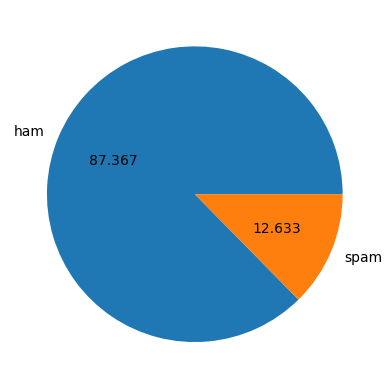

In [476]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.3f")

In [477]:
#data is imbalanced
import nltk

In [478]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [479]:
!pip install nltk

In [480]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\salma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [481]:
df['num_charecters']=df['text'].apply(len)

In [482]:
df.head()

,target,text,num_charecters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [483]:
#num of words
df['num_words'] =df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [484]:
df.head()

,target,text,num_charecters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [485]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [486]:
df.head()

,target,text,num_charecters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [487]:
df[['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [488]:
df[df['target'] == 0][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [489]:
df[df['target'] == 1][['num_charecters','num_words','num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [490]:
import seaborn as sns

C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

<Axes: xlabel='num_charecters', ylabel='Count'>

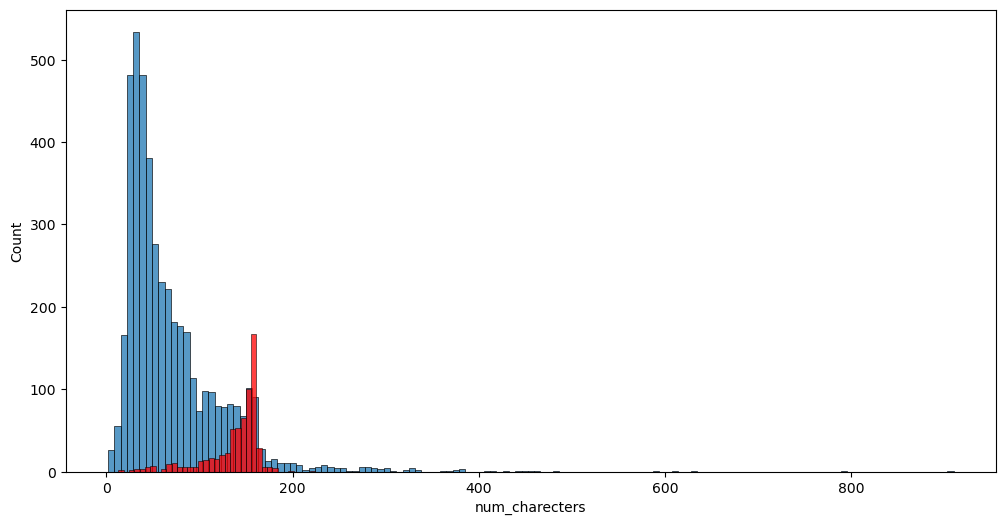

In [491]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'], color='red')

C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

<Axes: xlabel='num_words', ylabel='Count'>

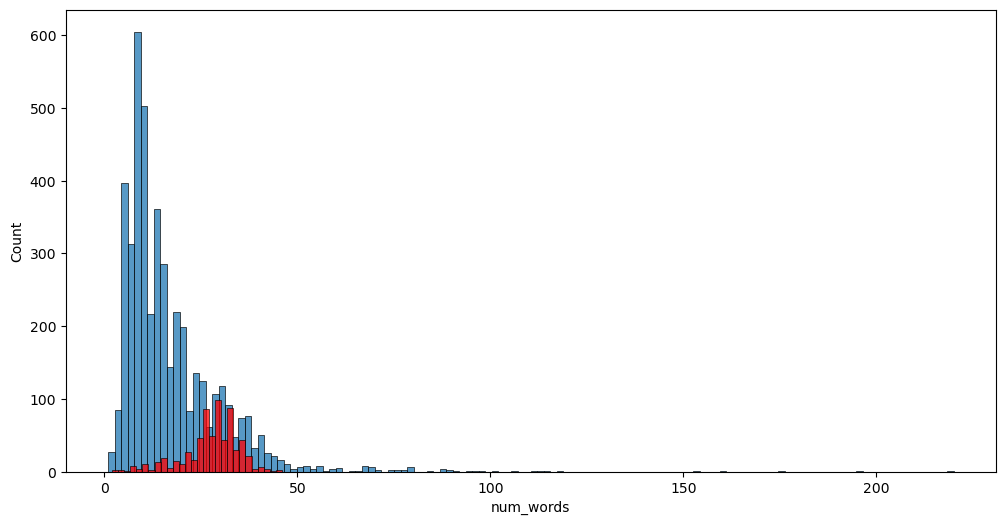

In [492]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\salma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

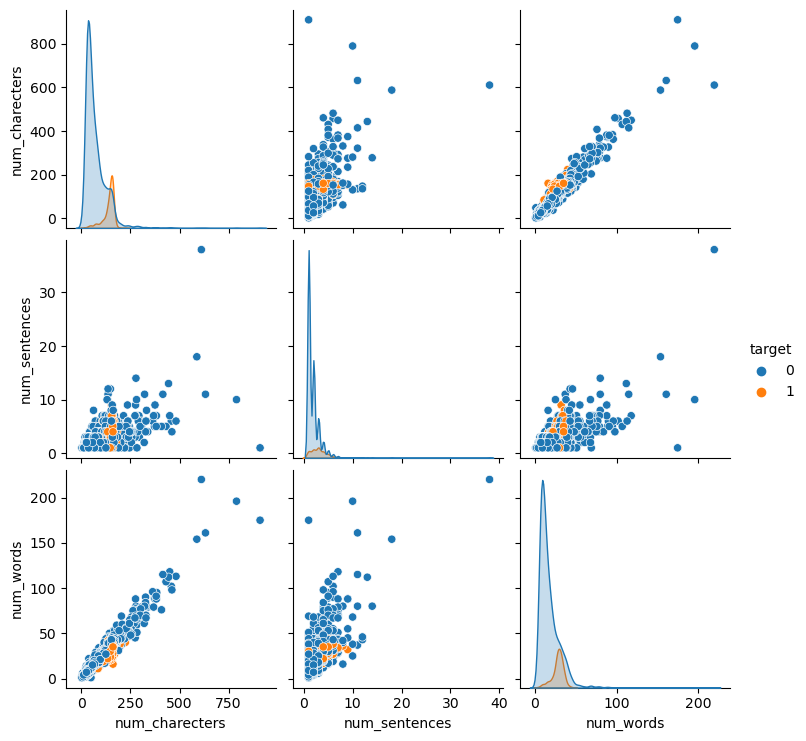

In [493]:
sns.pairplot(df,hue='target')

In [494]:

numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                  target  num_charecters  num_sentences  num_words
target          1.000000        0.384717       0.263939   0.262912
num_charecters  0.384717        1.000000       0.624139   0.965760
num_sentences   0.263939        0.624139       1.000000   0.679971
num_words       0.262912        0.965760       0.679971   1.000000


# 3. Data Preprocessing
. Lower case
. Tokenization
. Removing Special charecters
. Removing stop words and punctuations
. stemming

In [495]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i) 
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)  

In [496]:
transform_text("I love learning lectures abot machine learning on youtube")

'love learn lectur abot machin learn youtub'

In [497]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [498]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [499]:
transform_text('Hi How %%are you& salman')

'hi salman'

In [500]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [501]:
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer
ps = PorterStemmer()
stemmed_word = ps.stem('dancing')
print(stemmed_word)

danc


In [502]:
df['transform_text']=df['text'].apply(transform_text)

In [503]:
df.head()

,target,text,num_charecters,num_sentences,num_words,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [504]:
pip install --upgrade WordCloud 

Note: you may need to restart the kernel to use updated packages.


In [505]:
from wordcloud import WordCloud
wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [506]:
df.head()


,target,text,num_charecters,num_sentences,num_words,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15,nah think goe usf live around though


In [507]:
spam_corpus = []
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [508]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [509]:
len(spam_corpus)

9939

In [510]:
pip install --upgrade collection


Note: you may need to restart the kernel to use updated packages.


# Model Building

In [586]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [587]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [539]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [554]:
# appending the num_charecters col to X

#X = np.hstack((X,df['num_charecters'].values.reshape(-1,1)))

In [588]:
X.shape

(5169, 3000)

In [589]:
y= df['target'].values

In [590]:
from sklearn.model_selection import train_test_split

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [592]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [593]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [565]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [594]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [567]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [525]:
pip install --upgrade scikit-learn numpy scipy

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/82/0f/3f712cd84371636c5375d2dd70e7514d264cec6bdfc3d7997a4236e9f948/numpy-1.26.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.2 kB ? eta -:--:--
     ------------------------- ------------ 41.0/61.2 kB 653.6 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.2 kB 372.4 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 361.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.1 which is incompatible.



   -------- ------------------------------- 3.3/15.8 MB 31.3 kB/s eta 0:06:38
   -------- ------------------------------- 3.3/15.8 MB 31.3 kB/s eta 0:06:38
   -------- ------------------------------- 3.3/15.8 MB 31.3 kB/s eta 0:06:38
   -------- ------------------------------- 3.3/15.8 MB 31.3 kB/s eta 0:06:38
   -------- ------------------------------- 3.3/15.8 MB 31.3 kB/s eta 0:06:38
   -------- ------------------------------- 3.3/15.8 MB 31.3 kB/s eta 0:06:38
   -------- ------------------------------- 3.3/15.8 MB 31.3 kB/s eta 0:06:38
   -------- ------------------------------- 3.4/15.8 MB 31.2 kB/s eta 0:06:39
   -------- ------------------------------- 3.4/15.8 MB 31.2 kB/s eta 0:06:39
   -------- ------------------------------- 3.4/15.8 MB 31.2 kB/s eta 0:06:39
   -------- ------------------------------- 3.4/15.8 MB 31.2 kB/s eta 0:06:39
   -------- ------------------------------- 3.4/15.8 MB 31.2 kB/s eta 0:06:39
   -------- ------------------------------- 3.4/15.8 MB 31.2 kB

In [526]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [568]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [569]:
svc = SVC(kernel = 'sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb =MultinomialNB()
dtc =DecisionTreeClassifier(max_depth=5)
lrc =LogisticRegression(solver='liblinear', penalty='11')
rfc =RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimator=50, random_state=2)

In [570]:
clfs = {'SVC':svc, 'KN':knc, 'NB': mnb, 'DT':dtc, 'LR':lrc,
        'RF':rfc, 'AdaBoost':abc,'BgC':bc,'ETC':etc,'GBDT':gbdt,'xgb':xgb}

In [571]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy =accuracy_score(y_test,y_pred)
    precision =precision_score(y_test,y_pred)
    
    return accuracy,precision

In [572]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.943089430894309)

In [532]:
pip install --upgrade threadpoolctl scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [576]:
#voting classfier
svc = SVC(kernel='sigmoid',gamma=1.0, probability =True)
mnb =MultinomialNB()
etc = ExtraTreesClassifier(n_estimators =50, random_state =2)

from sklearn.ensemble import VotingClassifier

In [577]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [578]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [580]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [581]:
#Applying  stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [582]:
from sklearn.ensemble import StackingClassifier

In [583]:
clf=StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [585]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [595]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))